In [1]:
import pandas as pd
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
time = pd.to_datetime(ratings["timestamp"], unit="s")
ratings["timestamp"] = time
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15


In [5]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [11]:
ratings_mini = pd.read_csv("https://ai-academy.ru/upload/files/ratings_mini.csv")
ratings_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     96 non-null     int64  
 1   movieId    96 non-null     int64  
 2   rating     96 non-null     float64
 3   timestamp  96 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 KB


In [23]:
count = len(ratings)
r = ratings.rating.min()
print(count, r)

100836 0.5


### Объединение таблиц
У датафреймов ratings и movies есть общий столбец movieId. Значит, мы можем объединить эти датафреймы в одну таблицу, используя метод merge:

      joined = ratings.merge(movies, on='movieId', how='left')
      joined.head()

Схематично метод merge можно описать так:

      joined = left_df.merge(right_df, on='', how='')

Разбираем параметры метода:

left_df / right_df — датафреймы, которые мы объединяем. К "правому" датафрейму присоединяем "левый" (в нашем примере "левый" датафрейм — ratings, "правый" — movies).
how — параметр объединения записей. Он может иметь четыре значения: left, right, inner и outer.
on — определяет, по какому столбцу происходит объединение. Для объединения по нескольким столбцам используйте on = ['co
!l1', 'col2'].

[image.png](attachment:74a758be-ffd5-4e2b-b8a7-c5a5765b2a32.png)
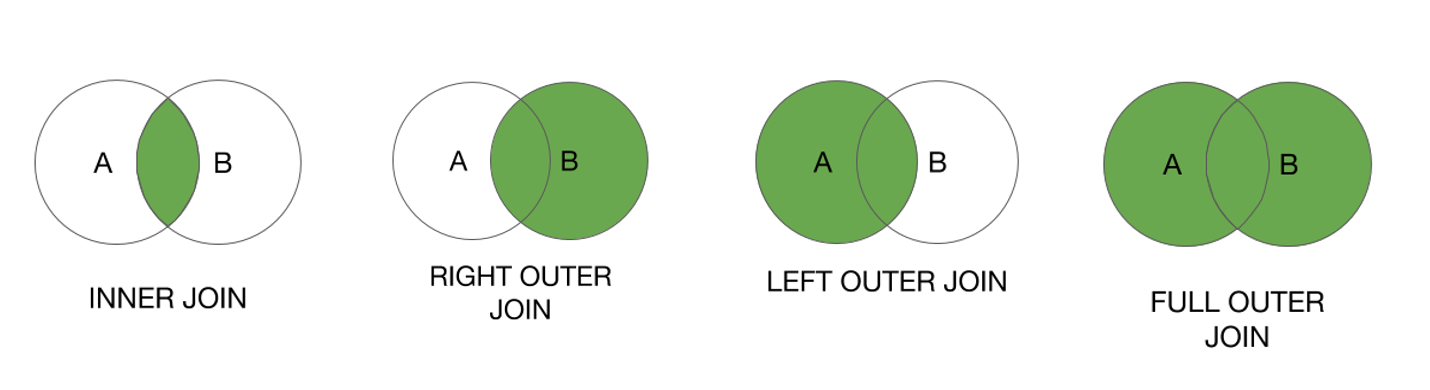

In [6]:
joined = ratings.merge(movies, on ="movieId", how = "left")
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [27]:
len(ratings) == len(joined) #проверка соотвествия количества записей

True

Удаление дубликатов
Объединение датафреймов с помощью метода merge имеет особенности: есть ситуации, которые в результате приводят к дублированию строк в объединенном датасете.

Для удаления дубликатов используем метод drop_duplicates. В параметре subset указываем один или несколько столбцов, по комбинации которых хотим удалить дубликаты.

С помощью параметра keep указываем, какой из дубликатов оставить (например, первый или последний). Параметр inplace указывает, что изменения нужно сохранить в датафрейме, к которому применяется метод (в нашем случае — в датафрейме movies):

      movies.drop_duplicates(subset = 'movieId', keep = 'first', inplace = True)
      movies.head()

In [8]:
display(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
